In [1]:
! pip install plotnine pandas mizani

# https://medium.com/@pablosjv/importing-local-python-modules-into-jupyter-notebooks-87336b2d7746
%load_ext autoreload
%autoreload 2


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

from data import csv_data_add_histogram, csv_data_search_histogram

#csv_data

# Calculate additional columns:
# csv_data_add_histogram['Rate'] = 1.0 * 1_000_000_000 / csv_data_add_histogram['Start Duration Inclusive']

# Split the class into parts:
# https://practicaldatascience.co.uk/data-science/how-to-split-strings-using-the-pandas-split-function#:~:text=The%20split()%20function%20has,times%20to%20split%20the%20string.
csv_data_search_histogram[['Class Info', 'Algorithm Test']] = csv_data_search_histogram['Class'].str.split(pat='$', expand=True)
csv_data_search_histogram['Algorithm'] = csv_data_search_histogram['Algorithm Test'].str.replace('Tests', '')

# Remove warmup data:
csv_data_search_histogram = csv_data_search_histogram[csv_data_search_histogram['Scenario'] != 'Warmup']


csv_data_search_histogram


Class  \
18     io.nanovc.indexing.examples.x.XIndex1DTests$Bi...   
19     io.nanovc.indexing.examples.x.XIndex1DTests$Bi...   
20     io.nanovc.indexing.examples.x.XIndex1DTests$Bi...   
21     io.nanovc.indexing.examples.x.XIndex1DTests$Bi...   
22     io.nanovc.indexing.examples.x.XIndex1DTests$Bi...   
...                                                  ...   
65517  io.nanovc.indexing.examples.x.XIndex1DTests$Re...   
65518  io.nanovc.indexing.examples.x.XIndex1DTests$Re...   
65519  io.nanovc.indexing.examples.x.XIndex1DTests$Re...   
65520  io.nanovc.indexing.examples.x.XIndex1DTests$Re...   
65521  io.nanovc.indexing.examples.x.XIndex1DTests$Re...   

                        Test  \
18     index_Random_Gaussian   
19     index_Random_Gaussian   
20     index_Random_Gaussian   
21     index_Random_Gaussian   
22     index_Random_Gaussian   
...                      ...   
65517    index_Random_Linear   
65518    index_Random_Linear   
65519    index_Random_Linear   
65520    index_Random_Linear   
65521    index_Random_Linear   

                                                 Display  \
18     [2] Random Gaussian Sampling Scenario = Tiny S...   
19     [2] Random Gaussian Sampling Scenario = Tiny S...   
20     [2] Random Gaussian Sampling Scenario = Tiny S...   
21     [2] Random Gaussian Sampling Scenario = Tiny S...   
22     [2] Random Gaussian Sampling Scenario = Tiny S...   
...                                                  ...   
65517  [38] Random Linear Sampling Scenario = Huge So...   
65518  [38] Random Linear Sampling Scenario = Huge So...   
65519  [38] Random Linear Sampling Scenario = Huge So...   
65520  [38] Random Linear Sampling Scenario = Huge So...   
65521  [38] Random Linear Sampling Scenario = Huge So...   

                         Timestamp  Queries      Range  Item Count   Scenario  \
18     2023-12-28T20:50:43.7744886    10000  1000000.0        1000  Tiny Some   
19     2023-12-28T20:50:43.7744886    10000  1000000.0        1000  Tiny Some   
20     2023-12-28T20:50:43.7744886    10000  1000000.0        1000  Tiny Some   
21     2023-12-28T20:50:43.7744886    10000  1000000.0        1000  Tiny Some   
22     2023-12-28T20:50:43.7744886    10000  1000000.0        1000  Tiny Some   
...                            ...      ...        ...         ...        ...   
65517  2023-12-28T22:44:28.4570698    10000  1000000.0    10000000  Huge Some   
65518  2023-12-28T22:44:28.4570698    10000  1000000.0    10000000  Huge Some   
65519  2023-12-28T22:44:28.4570698    10000  1000000.0    10000000  Huge Some   
65520  2023-12-28T22:44:28.4570698    10000  1000000.0    10000000  Huge Some   
65521  2023-12-28T22:44:28.4570698    10000  1000000.0    10000000  Huge Some   

       Start Duration Inclusive  End Duration Exclusive  Count  \
18                     0.000000                0.000000   3805   
19                   100.000000              102.329299   5979   
20                   199.526231              204.173794    123   
21                   301.995172              309.029543     38   
22                   398.107171              407.380278     15   
...                         ...                     ...    ...   
65517              10232.929923            10471.285481      1   
65518              12589.254118            12882.495517      1   
65519              13489.628826            13803.842646      1   
65520              13803.842646            14125.375446      1   
65521              85113.803820            87096.358996      1   

                                                    file  \
18     2023-12-28-20-50-43_index_Random_Gaussian.sear...   
19     2023-12-28-20-50-43_index_Random_Gaussian.sear...   
20     2023-12-28-20-50-43_index_Random_Gaussian.sear...   
21     2023-12-28-20-50-43_index_Random_Gaussian.sear...   
22     2023-12-28-20-50-43_index_Random_Gaussian.sear...   
...                                                  ...   
65517  2023-12-28-22-44-28_index_Rando

In [4]:
from numpy import log

# https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_tile.html#annotated-heatmap

scenarios = csv_data_search_histogram['Scenario'].unique()

plot_data = csv_data_search_histogram.copy()

plot_data['scenario'] = pd.Categorical(plot_data['Scenario'], categories = scenarios)

# Make sure we don't have zero durations (causes issues with log plots)
plot_data['Duration'] = plot_data['Start Duration Inclusive'].map(lambda v: 1 if v <= 0 else v)
plot_data['Start Duration'] = plot_data['Start Duration Inclusive'].map(lambda v: 1 if v <= 0 else v)
plot_data['End Duration'] = plot_data['End Duration Exclusive'].map(lambda v: 10.0 if v <= 0 else v)

# Work out more fields:
plot_data['Rate'] = plot_data['Duration'].map(lambda v: 1.0 / v)
plot_data['Count Ratio'] = plot_data['Count'] / plot_data['Item Count']
plot_data['Count Log'] = log(plot_data['Count'])
plot_data['Count Ratio Log'] = log(plot_data['Count Ratio'])

plot_data.head()




Class                   Test  \
18  io.nanovc.indexing.examples.x.XIndex1DTests$Bi...  index_Random_Gaussian   
19  io.nanovc.indexing.examples.x.XIndex1DTests$Bi...  index_Random_Gaussian   
20  io.nanovc.indexing.examples.x.XIndex1DTests$Bi...  index_Random_Gaussian   
21  io.nanovc.indexing.examples.x.XIndex1DTests$Bi...  index_Random_Gaussian   
22  io.nanovc.indexing.examples.x.XIndex1DTests$Bi...  index_Random_Gaussian   

                                              Display  \
18  [2] Random Gaussian Sampling Scenario = Tiny S...   
19  [2] Random Gaussian Sampling Scenario = Tiny S...   
20  [2] Random Gaussian Sampling Scenario = Tiny S...   
21  [2] Random Gaussian Sampling Scenario = Tiny S...   
22  [2] Random Gaussian Sampling Scenario = Tiny S...   

                      Timestamp  Queries      Range  Item Count   Scenario  \
18  2023-12-28T20:50:43.7744886    10000  1000000.0        1000  Tiny Some   
19  2023-12-28T20:50:43.7744886    10000  1000000.0        1000  Tiny Some   
20  2023-12-28T20:50:43.7744886    10000  1000000.0        1000  Tiny Some   
21  2023-12-28T20:50:43.7744886    10000  1000000.0        1000  Tiny Some   
22  2023-12-28T20:50:43.7744886    10000  1000000.0        1000  Tiny Some   

    Start Duration Inclusive  End Duration Exclusive  ...   Algorithm Test  \
18                  0.000000                0.000000  ...  BinaryTreeTests   
19                100.000000              102.329299  ...  BinaryTreeTests   
20                199.526231              204.173794  ...  BinaryTreeTests   
21                301.995172              309.029543  ...  BinaryTreeTests   
22                398.107171              407.380278  ...  BinaryTreeTests   

     Algorithm   scenario    Duration Start Duration End Duration      Rate  \
18  BinaryTree  Tiny Some    1.000000       1.000000    10.000000  1.000000   
19  BinaryTree  Tiny Some  100.000000     100.000000   102.329299  0.010000   
20  BinaryTree  Tiny Some  199.526231     199.526231   204.173794  0.005012   
21  BinaryTree  Tiny Some  301.995172     301.995172   309.029543  0.003311   
22  BinaryTree  Tiny Some  398.107171     398.107171   407.380278  0.002512   

    Count Ratio  Count Log  Count Ratio Log  
18        3.805   8.244071         1.336316  
19        5.979   8.696009         1.788253  
20        0.123   4.812184        -2.095571  
21        0.038   3.637586        -3.270169  
22        0.015   2.708050        -4.199705  

[5 rows x 23 columns]

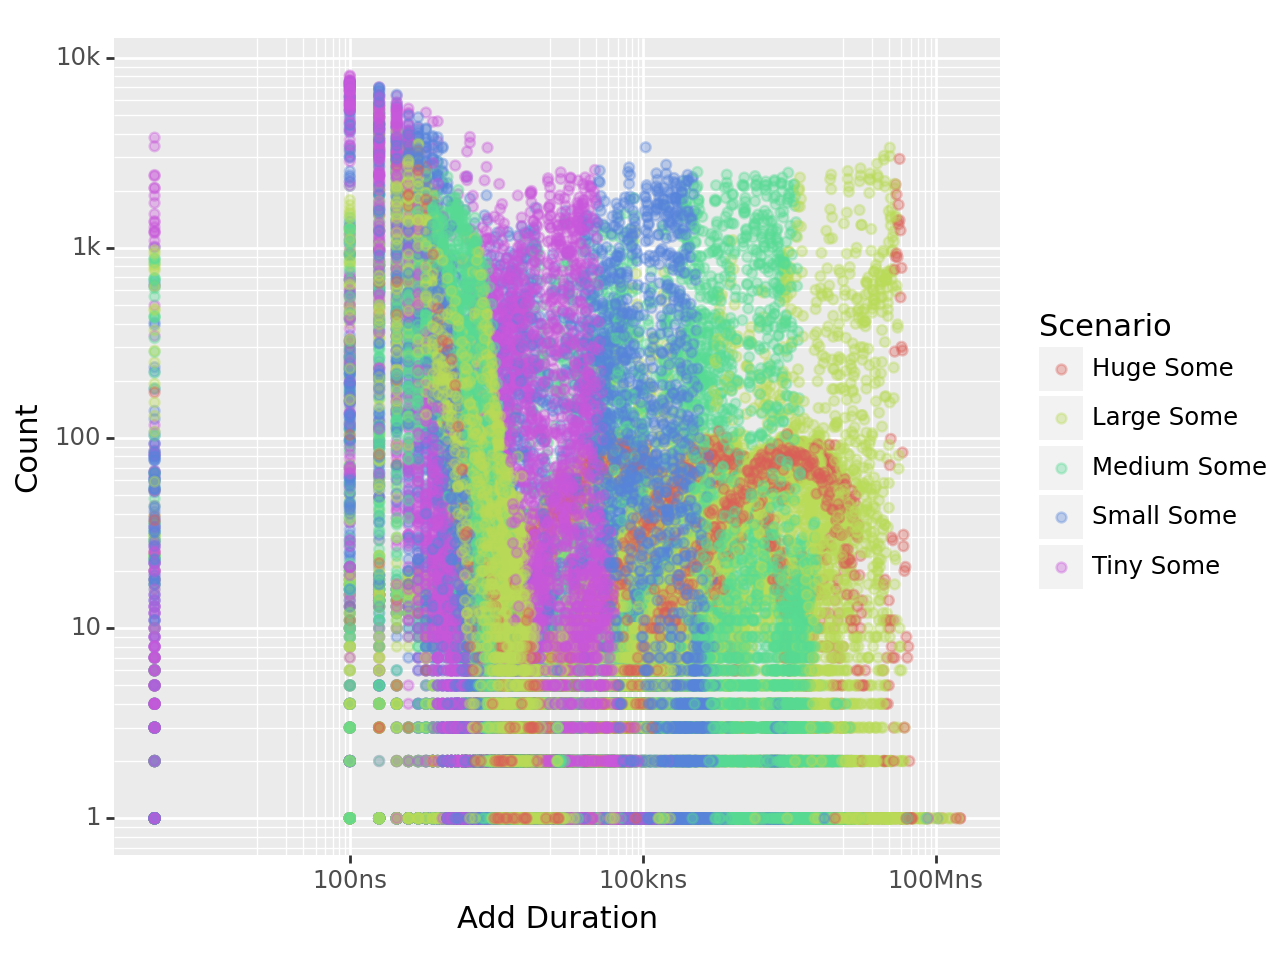

<Figure Size: (640 x 480)>

In [5]:

from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, scale_y_log10, geom_smooth, labs, scale_y_continuous, ggplot, \
    aes, geom_point

(ggplot(plot_data, aes(x="Duration", y="Count", color="Scenario"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix="ns"))
 #+ scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix="/s"))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 #+ scale_color_discrete(l=.4)
 #+ geom_smooth()
 + labs(x='Add Duration', y='Count')
 )

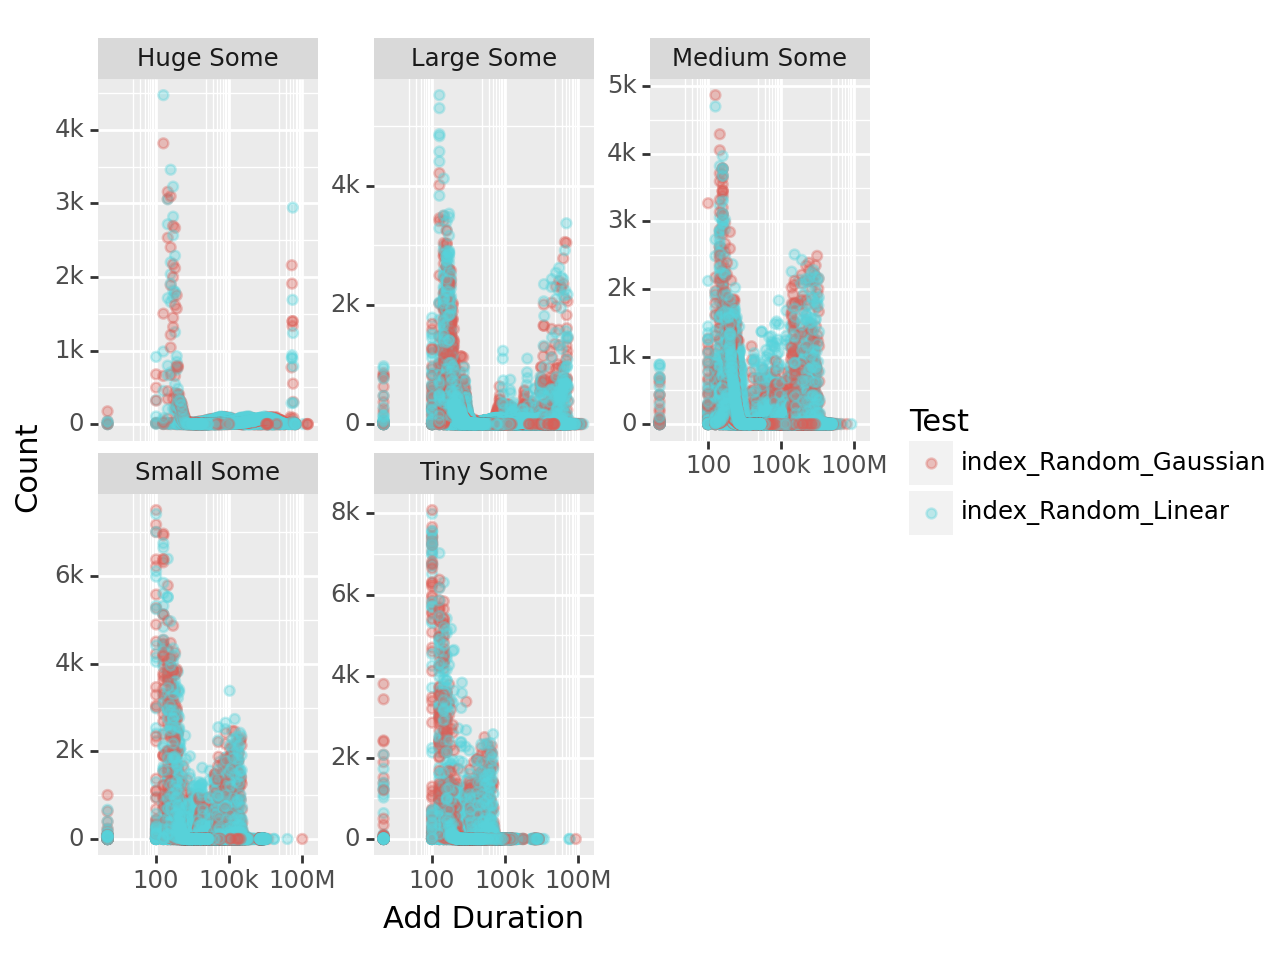

<Figure Size: (640 x 480)>

In [6]:

from formatters.number_suffix_format import number_suffix_format
from plotnine import ggplot, scale_x_log10, geom_smooth, labs, scale_y_continuous, facet_wrap

(ggplot(plot_data, aes(x="Duration", y="Count", color="Test"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 #+ scale_color_discrete(l=.4)
 #+ geom_smooth()
 + facet_wrap("Scenario", scales="free_y")
 + labs(x='Add Duration', y='Count')
 )

2k


C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10


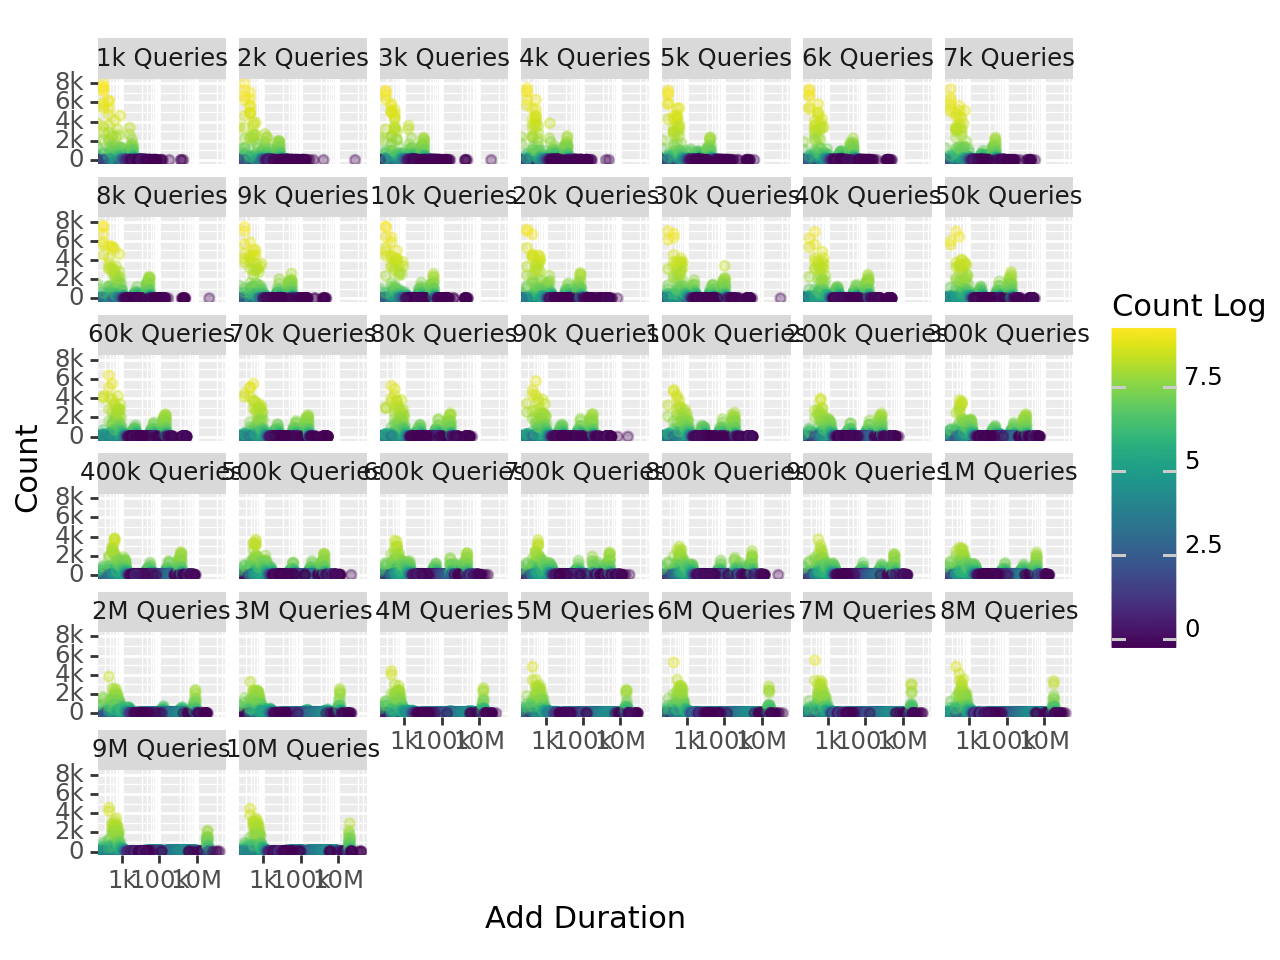

<Figure Size: (640 x 480)>

In [7]:
from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, geom_smooth, labs, scale_y_continuous, \
    facet_grid

# Facetting:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_grid.html


pretty_Format = number_suffix_format(fmt="{:.0f}")

print (pretty_Format([2134])[0])

def pretty_labeller(x):
    return pretty_Format([int(x)])[0] + " Queries"

(ggplot(plot_data, aes(x="Start Duration Inclusive", y="Count", color="Count Log"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 #+ scale_color_discrete(l=.4)
 #+ geom_smooth()
 + labs(x='Add Duration', y='Count')
 #+ facet_grid("Item Count ~ .", labeller=pretty_labeller)
 + facet_wrap("Item Count", labeller=pretty_labeller)
 )

C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10


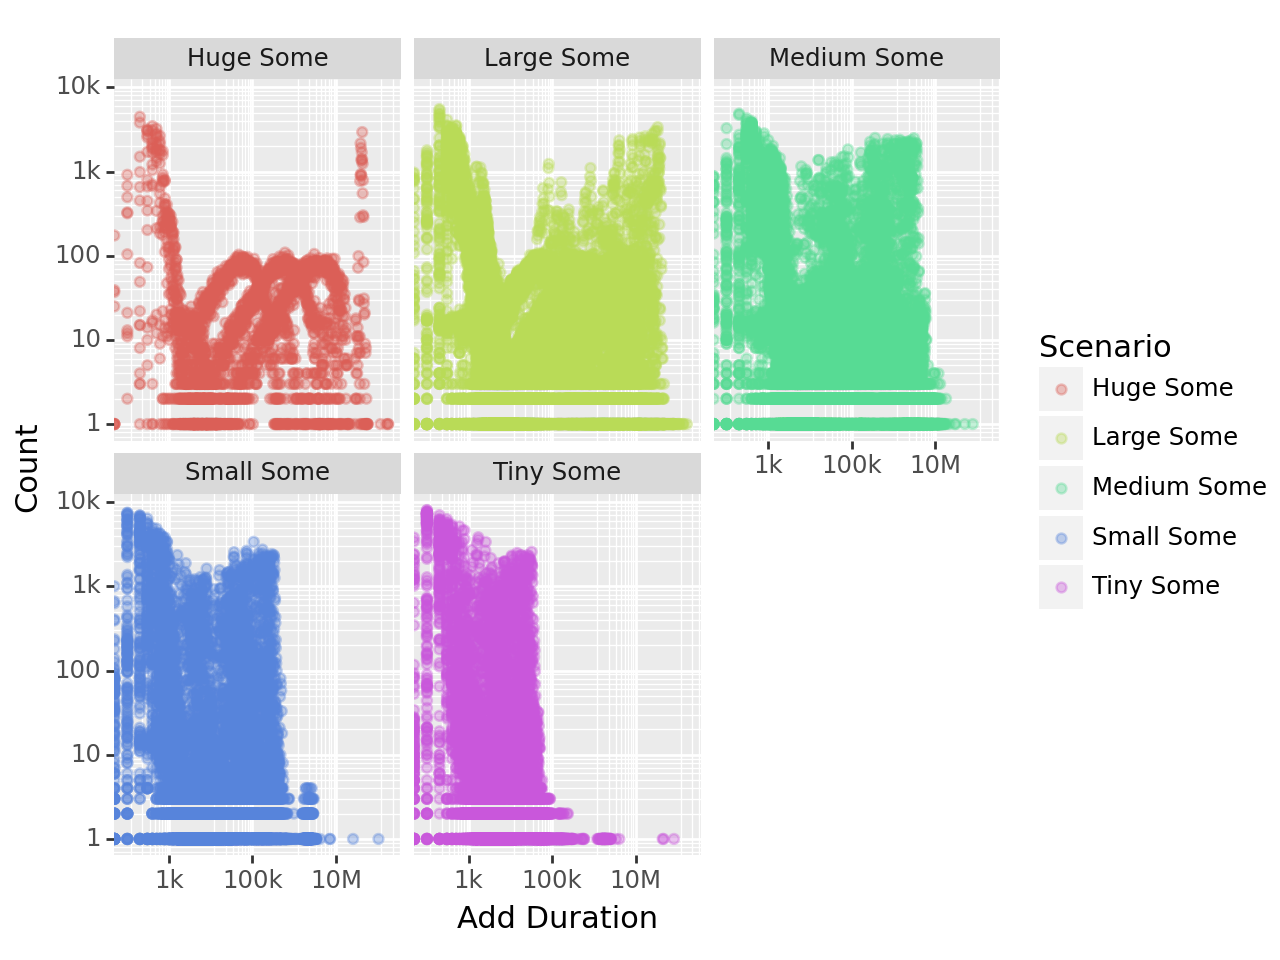

<Figure Size: (640 x 480)>

In [8]:
from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, scale_y_log10, geom_point, geom_smooth, labs, scale_y_continuous, \
    facet_wrap

# Facetting:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_grid.html


(ggplot(plot_data, aes(x="Start Duration Inclusive", y="Count", color="Scenario"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 #+ scale_color_discrete(l=.4)
 #+ geom_smooth()
 + labs(x='Add Duration', y='Count')
 + facet_wrap("Scenario")
 )

C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10


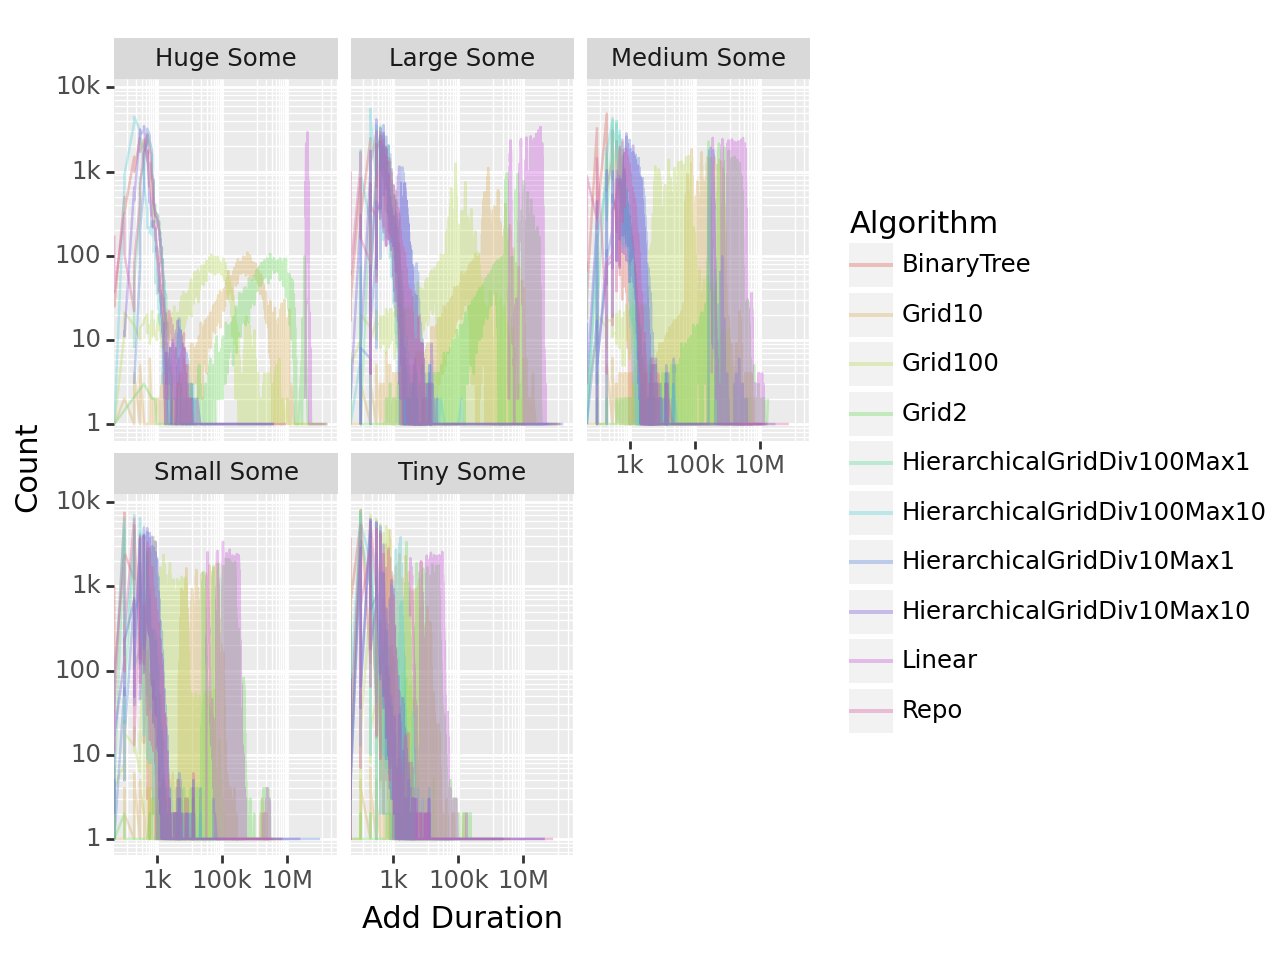

<Figure Size: (640 x 480)>

In [9]:
from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, scale_y_log10, geom_line, geom_smooth, labs, scale_y_continuous, \
    facet_wrap

# Facetting:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_grid.html


(ggplot(plot_data, aes(x="Start Duration Inclusive", y="Count", color="Algorithm"))
 + geom_line(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 #+ scale_color_discrete(l=.4)
 #+ geom_smooth()
 + labs(x='Add Duration', y='Count')
 + facet_wrap("Scenario")
 )

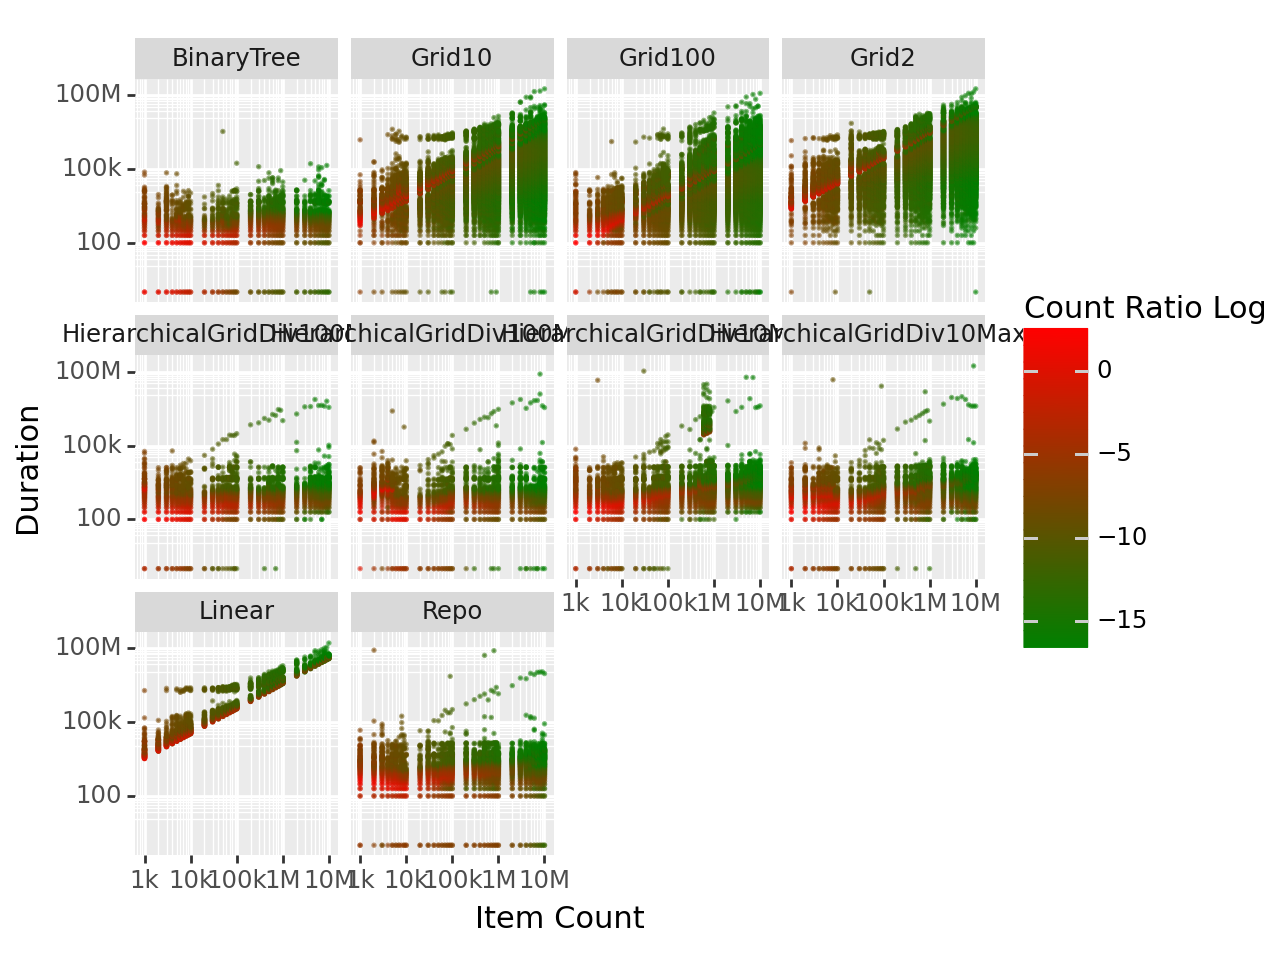

<Figure Size: (640 x 480)>

In [11]:
from plotnine import geom_tile, geom_text, geom_raster, geom_rect, scale_x_continuous, scale_fill_gradient, \
    scale_color_gradient, scale_color_gradient2

(ggplot(plot_data, aes('Item Count', 'Duration', color='Count Ratio Log'))
 + geom_point(size=0.1, alpha=0.5)
 #+ geom_tile(aes(width=.95, height=.95))
 #+ geom_text(aes(label='Count'), size=9)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_color_gradient(low='green', high='red')
 + facet_wrap("Algorithm")
 )

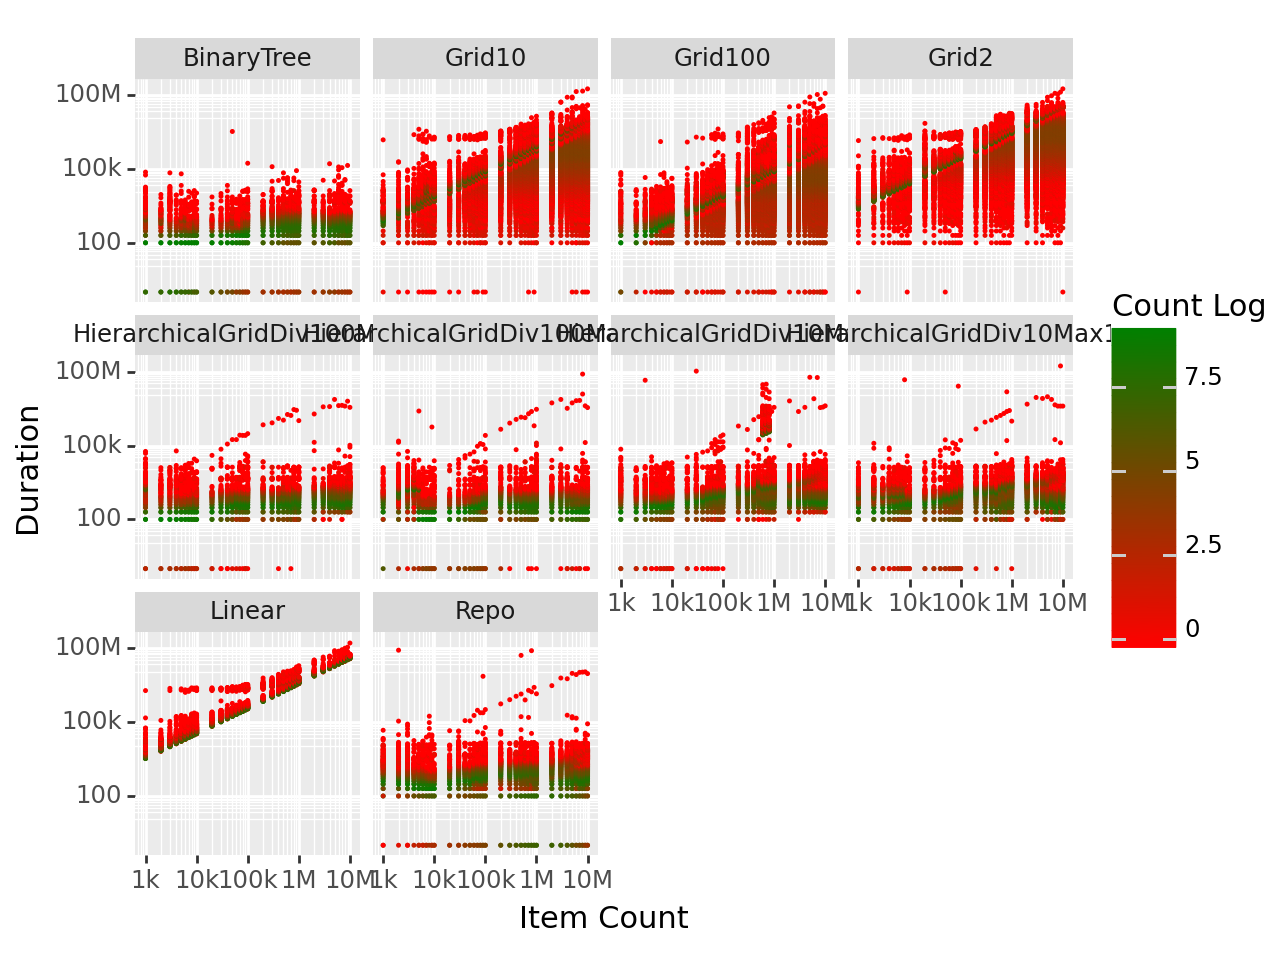

<Figure Size: (640 x 480)>

In [12]:
from plotnine import geom_tile, geom_text, geom_raster, geom_rect, scale_x_continuous, scale_fill_gradient, \
    scale_color_gradient, scale_color_gradient2

(ggplot(plot_data, aes('Item Count', 'Duration', color='Count Log', fill='Count Log'))
 + geom_point(size=0.01, alpha=1.0)
 #+ geom_tile(aes(width=.95, height=.95))
 #+ geom_text(aes(label='Count'), size=9)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_color_gradient(low='red', high='green')
 + scale_fill_gradient(low='red', high='green')
 + facet_wrap("Algorithm")
 )


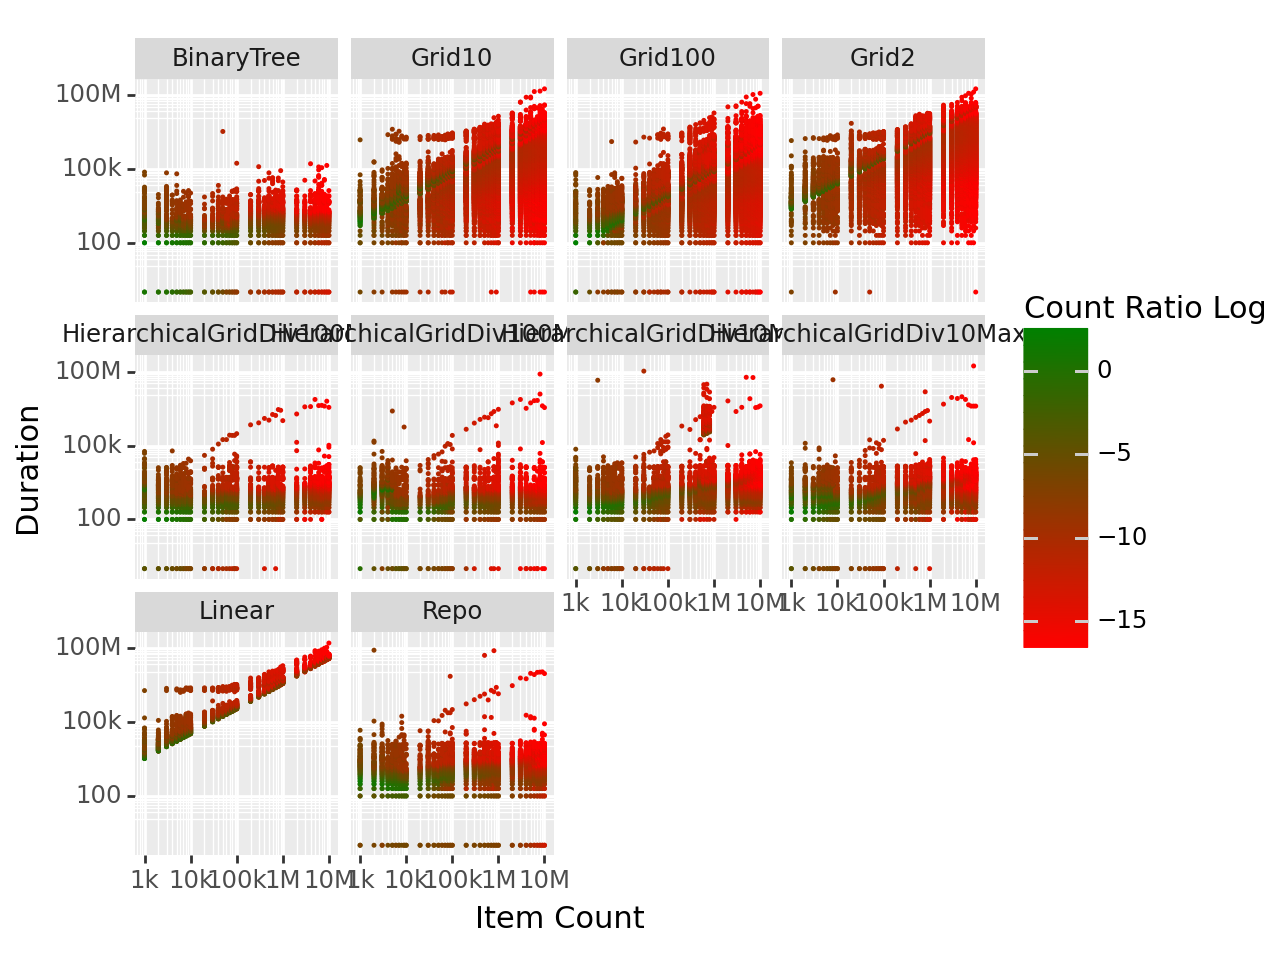

<Figure Size: (640 x 480)>

In [24]:
from plotnine import geom_tile, geom_text, geom_raster, geom_rect, scale_x_continuous, scale_fill_gradient, \
    scale_color_gradient, scale_color_gradient2

(ggplot(plot_data, aes('Item Count', 'Duration', color='Count Ratio Log', fill='Count Ratio Log'))
 + geom_point(size=0.01, alpha=1.0)
 #+ geom_tile(aes(width=.95, height=.95))
 #+ geom_text(aes(label='Count'), size=9)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
  # + scale_x_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
  # + scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_color_gradient(low='red', high='green')
 + scale_fill_gradient(low='red', high='green')
 + facet_wrap("Algorithm")
 )


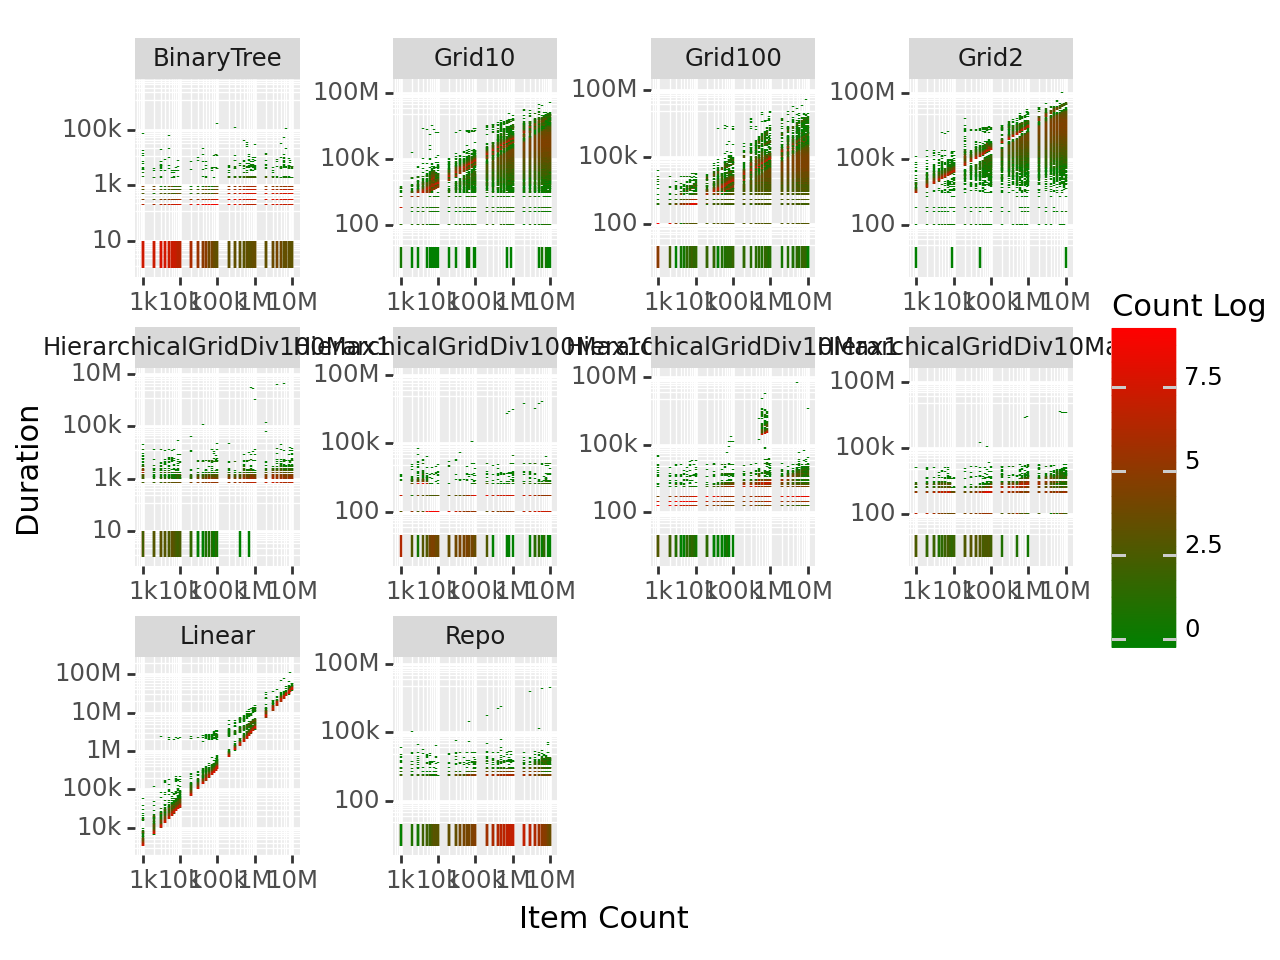

<Figure Size: (640 x 480)>

In [14]:
from plotnine import geom_tile, geom_text, geom_raster, geom_rect, scale_x_continuous, scale_fill_gradient, \
    scale_color_gradient, scale_color_gradient2

# https://ggplot2.tidyverse.org/reference/geom_tile.html
# geom_rect() and geom_tile() do the same thing, but are parameterised differently: geom_rect() uses the locations of the four corners (xmin, xmax, ymin and ymax), while geom_tile() uses the center of the tile and its size (x, y, width, height). geom_raster() is a high performance special case for when all the tiles are the same size. 
 
(ggplot(plot_data, aes("Item Count", "Duration"))
 + geom_rect(aes(xmin='Item Count', xmax='Item Count', ymin='Start Duration',ymax='End Duration', color='Count Log'))
 #+ geom_text(aes(label='Count'), size=9)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
# + scale_x_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
# + scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_color_gradient(low='green', high='red')
 + facet_wrap("Algorithm", scales="free")
 )

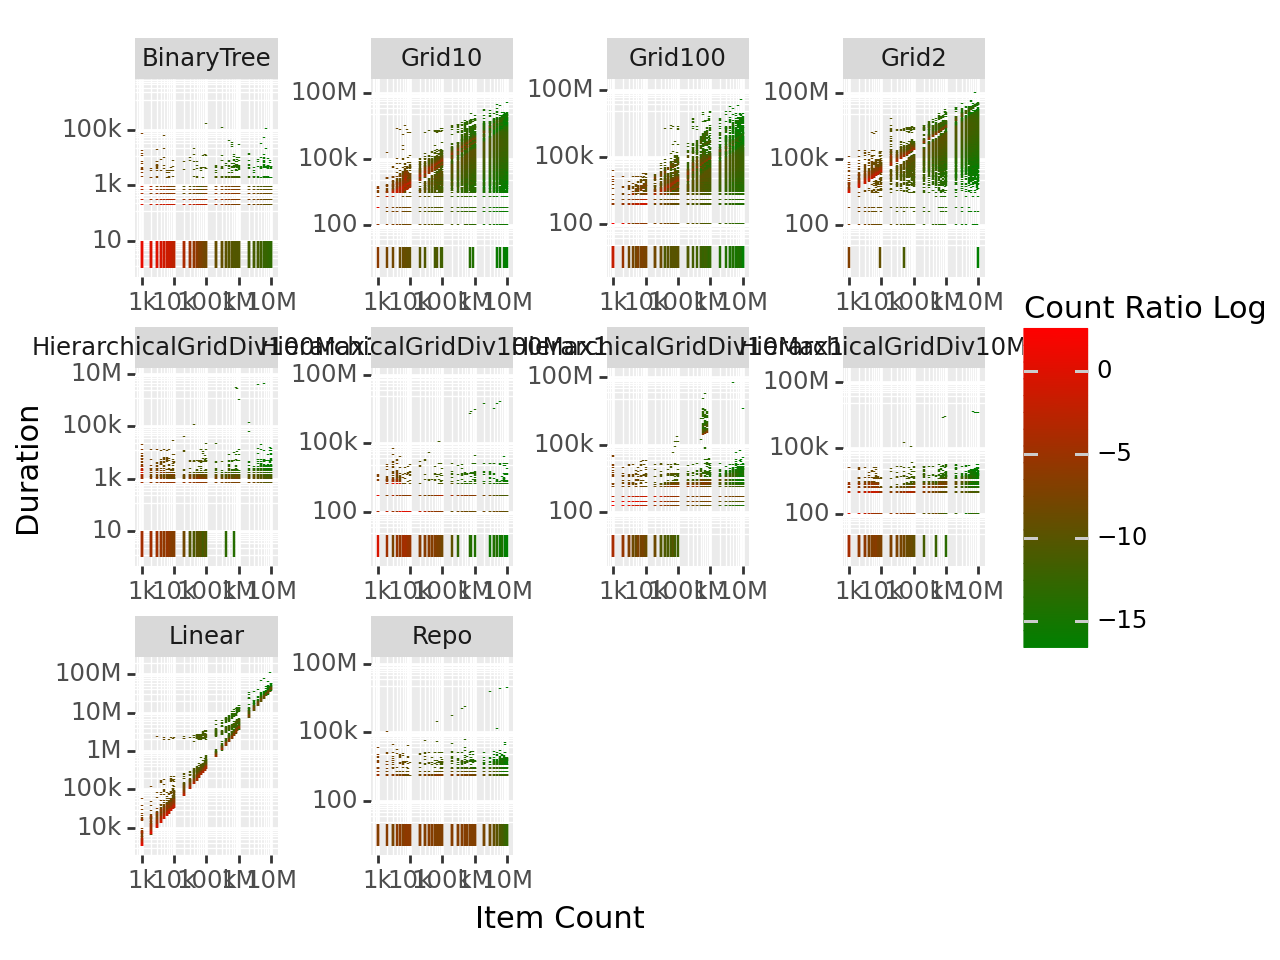

<Figure Size: (640 x 480)>

In [17]:
from plotnine import geom_tile, geom_text, geom_raster, geom_rect, scale_x_continuous, scale_fill_gradient, \
    scale_color_gradient, scale_color_gradient2

# https://ggplot2.tidyverse.org/reference/geom_tile.html
# geom_rect() and geom_tile() do the same thing, but are parameterised differently: geom_rect() uses the locations of the four corners (xmin, xmax, ymin and ymax), while geom_tile() uses the center of the tile and its size (x, y, width, height). geom_raster() is a high performance special case for when all the tiles are the same size. 

(ggplot(plot_data, aes("Item Count", "Duration"))
 + geom_rect(aes(xmin='Item Count', xmax='Item Count', ymin='Start Duration',ymax='End Duration', color='Count Ratio Log'))
 #+ geom_text(aes(label='Count'), size=9)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 # + scale_x_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 # + scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_color_gradient(low='green', high='red')
 + facet_wrap("Algorithm", scales="free")
 )